# [Abalone 데이터 나이 예측](http://archive.ics.uci.edu/ml/datasets/Abalone)

- abalone #4177건
- 7:3 비율로 train set / test set 데이터를 분할(random state = 20201005)
- train set -> 모델 -> test set -> 나이를 예측(rings) =>  rmsle적용 => 점수 출력
- random forest regressor 이용

In [1]:
import pandas as pd
import numpy as np

In [2]:
abalone=pd.read_csv("data/abalone.txt", sep=",", header=None, names=["sex", 'length', "diameter",
                                                       "height", "whole_weight",
                                                       "shucked_weight", "viscera_weight",
                                                       "shell_weight","rings"])
abalone

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## 1. `sex`칼럼의 카테고리화

In [3]:
abalone_sex = pd.get_dummies(abalone.sex, prefix="sex")
abalone_sex

,sex_F,sex_I,sex_M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


## 2. MinMax Scaling(정규화)

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler=MinMaxScaler()
abalone_minmax=pd.DataFrame(scaler.fit_transform(abalone.drop(['sex','rings'], axis=1)),
                            columns=['length','diameter','height','whole_weight',
                                     'shucked_weight','viscera_weight','shell_weight'])
abalone_minmax

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313
...,...,...,...,...,...,...,...
4172,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637
4173,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097
4174,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431
4175,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473


## 3. 데이터 가공

In [6]:
abalone_x = pd.concat([abalone_sex, abalone_minmax], axis=1)
abalone_x

,sex_F,sex_I,sex_M,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight
0,0,0,1,0.513514,0.521008,0.084071,0.181335,0.150303,0.132324,0.147982
1,0,0,1,0.371622,0.352941,0.079646,0.079157,0.066241,0.063199,0.068261
2,1,0,0,0.614865,0.613445,0.119469,0.239065,0.171822,0.185648,0.207773
3,0,0,1,0.493243,0.521008,0.110619,0.182044,0.144250,0.149440,0.152965
4,0,1,0,0.344595,0.336134,0.070796,0.071897,0.059516,0.051350,0.053313
...,...,...,...,...,...,...,...,...,...,...
4172,1,0,0,0.662162,0.663866,0.146018,0.313441,0.248151,0.314022,0.246637
4173,0,0,1,0.695946,0.647059,0.119469,0.341420,0.294553,0.281764,0.258097
4174,0,0,1,0.709459,0.705882,0.181416,0.415796,0.352724,0.377880,0.305431
4175,1,0,0,0.743243,0.722689,0.132743,0.386931,0.356422,0.342989,0.293473


In [7]:
abalone_y = abalone['rings']

## 4. 데이터 나누기

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
xTrain, xTest, yTrain, yTest=train_test_split(abalone_x.values, abalone_y.values, test_size=0.3, random_state=20201005)

In [10]:
xTrain.shape, yTrain.shape, xTest.shape, yTest.shape

((2923, 10), (2923,), (1254, 10), (1254,))

## 5. RandomForest 모델 생성

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [12]:
#임시 랜덤포레스트 모델 생성
rf = RandomForestRegressor(random_state=20201005, n_jobs=-1)

In [13]:
# 최적의 옵션 찾기
params={'n_estimators':[120, 125, 130],'max_depth': [8, 10, 12]}
gridCV=GridSearchCV(rf, param_grid=params, cv=5, n_jobs=-1)
gridCV.fit(xTrain, yTrain)
print(gridCV.best_params_)

{'max_depth': 8, 'n_estimators': 120}


In [14]:
# 최적의 랜덤포레스트 모델 생성
rfbest = RandomForestRegressor(random_state=20201005,
                               n_jobs=-1,
                               max_depth=gridCV.best_params_['max_depth'],
                               n_estimators=gridCV.best_params_['n_estimators'])

In [15]:
# Train 데이터로 모델 훈련
rfbest.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=8, n_estimators=120, n_jobs=-1,
                      random_state=20201005)

## 6. 예측

In [16]:
yPred = rfbest.predict(xTest)

In [17]:
yPred

array([10.4852725 ,  9.15679856,  9.85660891, ...,  5.62267803,
       10.01514791, 10.6060486 ])

## 7. Test 데이터의 예측값과 실제값의 비교 시각화

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\CJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


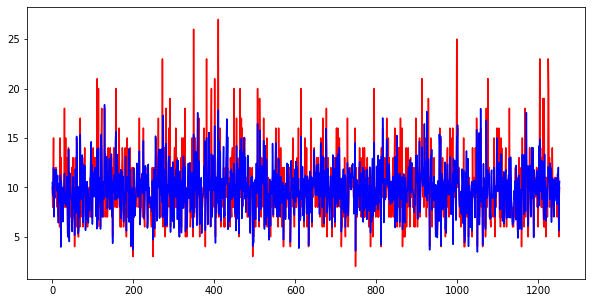

In [19]:
plt.figure(figsize=(10,5))
plt.plot(yTest, color='red')
plt.plot(yPred, color='blue')

## 8. 성능평가(rmsle 사용)

In [20]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [21]:
def rmsle(pv, av): #예측값, 실제값 비교하여 정확도 계산
    pv = np.array(pv)
    av = np.array(av)
    
    log_predict = np.log(pv+1)
    log_actual = np.log(av+1)
    
    res = log_predict-log_actual
    res = np.square(res)
    
    mean_res = res.mean()
    score = np.sqrt(mean_res)
    
    return score

In [22]:
rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [23]:
kfold = KFold(n_splits=10, shuffle=True, random_state=20201005) 

#Train데이터에 대한 성능평가
train_score = cross_val_score(rfbest, xTrain, yTrain, cv=kfold, scoring=rmsle_scorer)
print("Train데이터 기준 성능 :",  train_score.mean())

#Test데이터에 대한 성능평가
test_score = cross_val_score(rfbest, xTest, yTest, cv=kfold, scoring=rmsle_scorer)
print("Test데이터 기준 성능 :", test_score.mean())

Train데이터 기준 성능 : 0.17680157371320152
Test데이터 기준 성능 : 0.1722735551798475
